In [1]:
import numpy as np
import ipyvolume.pylab as plt3d

## $f(x,y)=(x-4)^2+(y-1)^2+100$, finding its minimal values

In [2]:
X = np.linspace(-5, 10, 100)  
Y = np.linspace(-5, 10, 100)  
X, Y = np.meshgrid(X, Y) 
Z = (X - 4)**2 + (Y - 1)**2 + 100

plt3d.figure()
plt3d.plot_surface(X, Z, Y, color="green")
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

## Newton Method

### From Scratch

In [3]:
def newton_method(f, x0, f_grad, f_hess, tol=1e-10):
    x = np.zeros([200, 2])
    x[0] = x0
    for k in range(199):
        x[k+1] = x[k] - f_grad(x[k]).dot(np.linalg.inv(f_hess(x[k])))
        if  np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
    return x[k+1], x[0:k+2]

In [4]:
def newton_method_gamma(f, x0, f_grad, f_hess, tol=1e-10):
    x = np.zeros([500, 2])
    x[0] = x0
    gamma = 0.1
    for k in range(499):
        x[k+1] = x[k] - gamma * f_grad(x[k]).dot(np.linalg.inv(f_hess(x[k])))
        if  np.linalg.norm(f_grad(x[k+1])) < tol:
            print("The number of iteration: {}".format(k + 1))
            break
    return x[k+1], x[0:k+2]

In [6]:
import sympy

x, y = sympy.symbols("x, y")
f_sym = (x - 4)**2 + (y-1)**2 + 100
f_mat = sympy.Matrix([f_sym])
f_grad_sym = f_mat.jacobian([x, y])
f_hess_sym = f_grad_sym.jacobian([x, y])

f_lamb = sympy.lambdify((x, y), f_sym, 'numpy')
fgrad_lamb = sympy.lambdify((x, y), f_grad_sym, 'numpy')
fhess_lamb = sympy.lambdify((x, y), f_hess_sym, 'numpy')

In [7]:
def func_XY_to_X_Y(f):
    return lambda X: np.array(f(X[0], X[1]))

In [8]:
f = func_XY_to_X_Y(f_lamb)
f_grad = func_XY_to_X_Y(fgrad_lamb)
f_hess = func_XY_to_X_Y(fhess_lamb)

In [9]:
mini, minis = newton_method(f, np.array([0, 0]), f_grad, f_hess)
mini, minis

The number of iteration: 1


(array([4., 1.]), array([[0., 0.],
        [4., 1.]]))

In [10]:
mini1, minis1 = newton_method_gamma(f, np.array([-5, 5]), f_grad, f_hess)
mini1

The number of iteration: 247


array([4., 1.])

In [11]:
plt3d.figure()
plt3d.plot_surface(X, Z, Y, color="green")
for i, m in enumerate(minis1):
    if i == len(minis1)-1:
        plt3d.scatter(np.array([mini1[0]]), np.array([f(mini1)]), np.array([mini1[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='blue')
    
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

In [12]:
mini2, minis2 = newton_method_gamma(f, np.array([-5, -5]), f_grad, f_hess)
mini2

The number of iteration: 248


array([4., 1.])

In [13]:
mini3, minis3 = newton_method_gamma(f, np.array([5, 5]), f_grad, f_hess)
mini3

The number of iteration: 239


array([4., 1.])

In [14]:
mini4, minis4 = newton_method_gamma(f, np.array([5, -5]), f_grad, f_hess)
mini4

The number of iteration: 243


array([4., 1.])

In [15]:
plt3d.clear()
plt3d.figure()
plt3d.plot_surface(X, Z, Y, color="green")
for i, m in enumerate(minis1):
    if i == len(minis1)-1:
        plt3d.scatter(np.array([mini1[0]]), np.array([f(mini1)]), np.array([mini1[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='blue')

for i, m in enumerate(minis2):
    if i == len(minis2)-1:
        plt3d.scatter(np.array([mini2[0]]), np.array([f(mini2)]), np.array([mini2[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='yellow')

for i, m in enumerate(minis3):
    if i == len(minis3)-1:
        plt3d.scatter(np.array([mini3[0]]), np.array([f(mini3)]), np.array([mini3[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='black')
    
for i, m in enumerate(minis4):
    if i == len(minis4)-1:
        plt3d.scatter(np.array([mini4[0]]), np.array([f(mini4)]), np.array([mini4[1]]), 
                 size=3, marker="diamond", color='red')
        break
    plt3d.scatter(np.array([m[0]]), np.array([f(m)]), np.array([m[1]]), 
                 size=2, marker="sphere", color='purple')
    
plt3d.zlabel("y")
plt3d.ylabel("z")
plt3d.show()

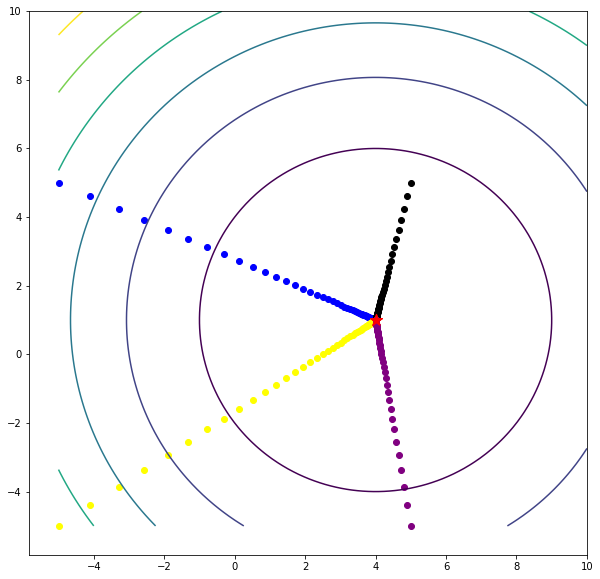

In [30]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
plt.contour(X, Y, Z)
for i, mini in enumerate(minis1):
    if i == len(minis1)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=150)
        break
    plt.scatter(mini[0], mini[1], c='blue')
    
for i, mini in enumerate(minis2):
    if i == len(minis2)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=150)
        break
    plt.scatter(mini[0], mini[1], c='yellow')
    
for i, mini in enumerate(minis3):
    if i == len(minis3)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=150)
        break
    plt.scatter(mini[0], mini[1], c='black')
    
for i, mini in enumerate(minis4):
    if i == len(minis4)-1:
        plt.scatter(mini[0], mini[1], c='red', marker="*", s=150)
        break
    plt.scatter(mini[0], mini[1], c='purple')

plt.show()

### Using `Scipy`

In [11]:
from scipy import optimize

x_opt = optimize.minimize(f, (0, 0))
x_opt

      fun: 100.0000000000097
 hess_inv: array([[ 0.52941204, -0.11764756],
       [-0.11764756,  0.97058797]])
      jac: array([ 9.53674316e-07, -5.72204590e-06])
  message: 'Optimization terminated successfully.'
     nfev: 16
      nit: 3
     njev: 4
   status: 0
  success: True
        x: array([4.00000067, 0.99999696])